In [1]:

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns





In [2]:
df1= pd.read_csv("./data/train.csv")

In [3]:
df1.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0, 0.5, '')

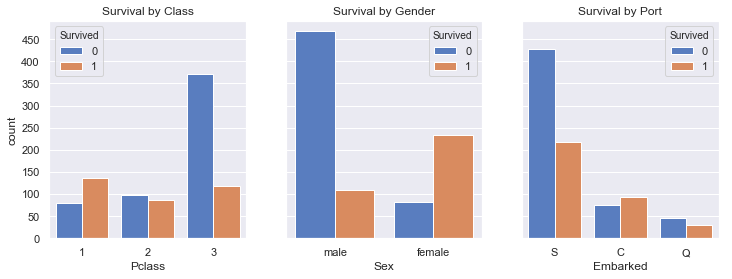

In [6]:
#copy data for analysis
df_analysis = df1.copy()

sns.set()
sns.set_palette("muted")

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(12,4))

sns.countplot(x="Pclass", hue="Survived", data=df_analysis, ax=ax[0])
ax[0].set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])
ax[0].set_title('Survival by Class')

sns.countplot(x="Sex", hue="Survived", data=df_analysis, ax=ax[1])
ax[1].set_title('Survival by Gender')
ax[1].set_ylabel('')

sns.countplot(x="Embarked", hue="Survived", data=df_analysis, ax=ax[2])
ax[2].set_title('Survival by Port')
ax[2].set_ylabel('')

In [7]:
#Analyze for null values
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#normalize data
df1=df1.replace(["male","female"],[0,1])
df1 = df1.replace(["S", "C", "Q"], [0,1,2])
df1=df1.fillna(0)

In [9]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
Y=df1[["Survived"]]
X=df1[["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]

In [11]:
# convert to numpy array for NN
X = X.astype(np.float32).values
Y = Y.astype(np.float32).values

In [12]:
#Import test data
df2 = pd.read_csv("./data/test.csv")

In [13]:
df2 = df2.replace(["male", "female"], [0,1])
df2 = df2.replace(["S", "C", "Q"], [0,1,2])
df2= df2.fillna(0)

In [14]:
X_Test = df2[["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
X_Test = X_Test.astype(np.float32).values

In [15]:
# data split
from sklearn.model_selection import train_test_split

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [17]:
seed = 42
np.random.seed(seed)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2)

C:\Users\ismael\Anaconda3\envs\curso_gpu\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
# Model 
model = Sequential()
#input layer
model.add(Dense(8, input_shape=(8,)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.4))

# hidden layers
model.add(Dense(8))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dropout(0.4))
    
model.add(Dense(4))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dropout(0.4))
    
model.add(Dense(2, activation="sigmoid"))
    
# output layer
model.add(Dense(1, activation='linear'))

In [19]:
# model compile for binary classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# learning
model.fit(X, Y, epochs=100, batch_size=30)

Epoch 1/100
891/891 [==============================] - 2s 2ms/step - loss: 0.6981 - acc: 0.5196
Epoch 2/100
891/891 [==============================] - 0s 187us/step - loss: 0.6741 - acc: 0.5668
Epoch 3/100
891/891 [==============================] - 0s 185us/step - loss: 0.6763 - acc: 0.5836
Epoch 4/100
891/891 [==============================] - 0s 185us/step - loss: 0.6765 - acc: 0.5903
Epoch 5/100
891/891 [==============================] - 0s 189us/step - loss: 0.6784 - acc: 0.6049
Epoch 6/100
891/891 [==============================] - 0s 193us/step - loss: 0.6835 - acc: 0.5926
Epoch 7/100
891/891 [==============================] - 0s 192us/step - loss: 0.6666 - acc: 0.6207
Epoch 8/100
891/891 [==============================] - 0s 186us/step - loss: 0.6787 - acc: 0.5903
Epoch 9/100
891/891 [==============================] - 0s 190us/step - loss: 0.6693 - acc: 0.6105
Epoch 10/100
891/891 [==============================] - 0s 188us/step - loss: 0.6787 - acc: 0.5937
Epoch 11/100
891/891 

891/891 [==============================] - 0s 186us/step - loss: 0.6283 - acc: 0.6308
Epoch 84/100
891/891 [==============================] - 0s 196us/step - loss: 0.6256 - acc: 0.6274
Epoch 85/100
891/891 [==============================] - 0s 193us/step - loss: 0.6287 - acc: 0.6330
Epoch 86/100
891/891 [==============================] - 0s 186us/step - loss: 0.6179 - acc: 0.6599
Epoch 87/100
891/891 [==============================] - 0s 194us/step - loss: 0.6301 - acc: 0.6308
Epoch 88/100
891/891 [==============================] - 0s 192us/step - loss: 0.6140 - acc: 0.6510
Epoch 89/100
891/891 [==============================] - 0s 185us/step - loss: 0.6210 - acc: 0.6274
Epoch 90/100
891/891 [==============================] - 0s 199us/step - loss: 0.6149 - acc: 0.6476
Epoch 91/100
891/891 [==============================] - 0s 188us/step - loss: 0.6060 - acc: 0.6588
Epoch 92/100
891/891 [==============================] - 0s 187us/step - loss: 0.6093 - acc: 0.6352
Epoch 93/100
891/891 [=

In [21]:
# float to [0,1]
predictions = np.round(model.predict(X_Test))

In [22]:
predictions = pd.DataFrame(predictions)

In [23]:
# result
result = pd.concat([df1[["PassengerId"]], predictions], axis = 1)

In [25]:
print(X_test)

[[710.       3.       0.     ...   1.      15.2458   1.    ]
 [440.       2.       0.     ...   0.      10.5      0.    ]
 [841.       3.       0.     ...   0.       7.925    0.    ]
 ...
 [825.       3.       0.     ...   1.      39.6875   0.    ]
 [804.       3.       0.     ...   1.       8.5167   1.    ]
 [620.       2.       0.     ...   0.      10.5      0.    ]]
